# FOOTBALL DATA

This dataset is from 'Methods of Multivariate Analysis' by 'Alvin C. Rencher'. The data set include 6 variables of human head measure (horizental and verticales measure). The 3 groups are known and are : Group 1 'Non-football player', 'College football players' and 'professional football players'. We first perform a discriminnat analysis usong PCA(Principal Components Analysis) then we evaluate the estimation errors using some statistical tests like Mahamnbois distance, plug-in estimators and cross-validation methods.

In [1]:
import numpy as np
myarray = np.fromfile('T8_3_FOOTBALL.dat',dtype=float)

In [5]:
import pandas as pd    

with open('T8_3_FOOTBALL.dat','r') as f:
    next(f) # skip first row
    df = pd.DataFrame(l.rstrip().split() for l in f)

df.head()

,0,1,2,3,4,5,6
0,1,15.50,58.42,21.00,12.00,16.00,12.00
1,1,14.50,55.88,19.00,10.00,13.00,12.00
2,1,15.50,58.42,20.00,13.50,15.00,12.00
3,1,14.50,58.42,20.00,13.00,15.50,12.00
4,1,14.00,60.96,21.00,12.00,14.00,13.00


In [95]:
X = df.iloc[0:, 1:].values
y = df.iloc[0:, 0].values
X = X.astype(float)
y = y.astype(int)#.fillna(0.0) for numpy np.nan_to_num(x)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [ 15.25862069  58.99862069  20.12931034  13.10344828  14.75862069
  12.31034483]

Mean Vector class 2: [ 15.42        57.37966667  19.80333333  10.08        13.45333333
  11.94333333]

Mean Vector class 3: [ 15.58        57.77        19.81        10.94666667  13.69666667
  11.80333333]



# Within-class scatter matrix $S_W$

In [102]:
S_W = np.zeros((6,6))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((6,6))                  # scatter matrix for every class
    for row in X[y == cl]:
        row, mv = row.reshape(6,1), mv.reshape(6,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('within-class Scatter Matrix:\n')
print(S_W)

within-class Scatter Matrix:

[[  3.42663448e+01   4.71385448e+01   1.26691724e+01   6.26413793e+00
    9.54634483e+00   1.76084138e+01]
 [  4.71385448e+01   2.71711641e+02   8.76132057e+01   5.57069379e+01
    2.82298782e+01   4.16018471e+01]
 [  1.26691724e+01   8.76132057e+01   4.71142529e+01   6.31506897e+00
    1.07258391e+01   1.30458736e+01]
 [  6.26413793e+00   5.57069379e+01   6.31506897e+00   1.06872322e+02
    2.69408046e+01   2.93029885e+00]
 [  9.54634483e+00   2.82298782e+01   1.07258391e+01   2.69408046e+01
    5.32146782e+01  -1.66586207e-01]
 [  1.76084138e+01   4.16018471e+01   1.30458736e+01   2.93029885e+00
   -1.66586207e-01   3.10102299e+01]]


# Performing the between class matrix

In [101]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((6,6))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[y==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(6,1) # make column vector
    overall_mean = overall_mean.reshape(6,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('between-class Scatter Matrix:\n')
print(S_B)

between-class Scatter Matrix:

[[   1.52309337   -5.78219651   -1.50658814  -10.14301434   -5.00162573
    -2.39830143]
 [  -5.78219651   41.91772255    9.02009201   77.17236544   34.371796
    11.34488321]
 [  -1.50658814    9.02009201    2.03585949   16.4247625     7.49045305
     2.74260958]
 [ -10.14301434   77.17236544   16.4247625   142.42543097   63.0997572
    20.30947643]
 [  -5.00162573   34.371796      7.49045305   63.0997572    28.27768139
     9.60164239]
 [  -2.39830143   11.34488321    2.74260958   20.30947643    9.60164239
     4.02774764]]


# Step 3: Solving the generalized eigenvalue problem for the matrix $S^{-1}_wS_B$

In [103]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(6,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[ 0.59880592]
 [ 0.00580903]
 [-0.01317185]
 [-0.43912831]
 [-0.34348593]
 [-0.57481124]]
Eigenvalue 1: 1.89e+00

Eigenvector 2: 
[[  6.44845828e-01]
 [ -1.49607402e-05]
 [ -1.33481196e-02]
 [  2.44934278e-01]
 [ -1.77133338e-01]
 [ -7.01873683e-01]]
Eigenvalue 2: 1.16e-01

Eigenvector 3: 
[[ 0.63085315]
 [ 0.0912221 ]
 [ 0.14155981]
 [ 0.02178641]
 [-0.29220822]
 [ 0.60903442]]
Eigenvalue 3: 1.76e-17

Eigenvector 4: 
[[ 0.63085315]
 [ 0.0912221 ]
 [ 0.14155981]
 [ 0.02178641]
 [-0.29220822]
 [ 0.60903442]]
Eigenvalue 4: 1.76e-17

Eigenvector 5: 
[[ 0.55582606]
 [-0.06784434]
 [-0.25597624]
 [ 0.10639339]
 [-0.22625727]
 [ 0.69925304]]
Eigenvalue 5: -1.21e-16

Eigenvector 6: 
[[ 0.55582606]
 [-0.06784434]
 [-0.25597624]
 [ 0.10639339]
 [-0.22625727]
 [ 0.69925304]]
Eigenvalue 6: -1.21e-16


In [104]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

1.88822754152
0.115527409358
1.34547023678e-16
1.34547023678e-16
9.92037983598e-17
9.92037983598e-17


In [105]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))


Variance explained:

eigenvalue 1: 94.23%
eigenvalue 2: 5.77%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%


In [110]:
W = np.hstack((eig_pairs[0][1].reshape(6,1), eig_pairs[1][1].reshape(6,1)))
print('Matrix W:\n')
W.real

Matrix W:



array([[  5.98805920e-01,   6.44845828e-01],
       [  5.80902547e-03,  -1.49607402e-05],
       [ -1.31718505e-02,  -1.33481196e-02],
       [ -4.39128315e-01,   2.44934278e-01],
       [ -3.43485932e-01,  -1.77133338e-01],
       [ -5.74811243e-01,  -7.01873683e-01]])

In [115]:
X_lda = X.dot(W)
assert X_lda.shape == (89,2), "The matrix is not 89x2 dimensional."
label_dict = {1: 'Groupe 1', 2: 'Groupe 2', 3:'Groupe 3'}

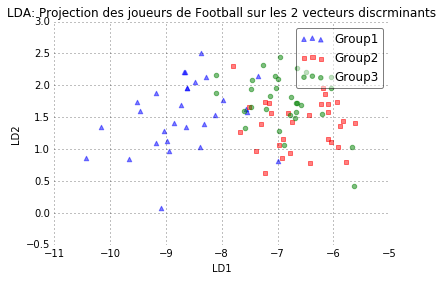

In [133]:
from matplotlib import pyplot as plt

def plot_step_lda():
#   colors = np.random.rand(100)
#    'navy', 'turquoise', 'darkorange'
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,6),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Projection des joueurs de Football sur les 2 vecteurs discrminants')
    
    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
 
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_step_lda()

We definetly see the group 1 is more distinguished group, the discrminant function performs well in diferenciating the group 1. However the others groups still mitigated. We could consider then others way to distinguish them, we could try a non-parametric methods such that Clustering methods.